In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [3]:
df = pd.read_json("/home/zeng/INFLUENZA_DATABASE/H3N2/data/isolation_information.json", orient='index')
df = df.replace('', np.nan)

In [4]:
df['region'] = df['location'].str.split(' / ').str.get(0)
df['country'] = df['location'].str.split(' / ').str.get(1)
df.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country
EPI_ISL_357698,EPI1447700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-01,NaN,Asia / Malaysia,A/Malaysia/1016/2003,Asia,Malaysia
EPI_ISL_357668,EPI1447649,EPI1447644,EPI1447648,EPI1447642,EPI1447643,EPI1447645,EPI1447647,EPI1447646,2003-05-20,NaN,Oceania / New Zealand / Waikato / Waikato,A/Waikato/1/2003,Oceania,New Zealand
EPI_ISL_357648,EPI1447603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-12-01,NaN,Oceania / Australia / Tasmania,A/Victoria/101/2003,Oceania,Australia
EPI_ISL_357641,EPI1447592,NaN,EPI1447591,NaN,NaN,NaN,NaN,NaN,2003-08-26,NaN,Oceania / Australia,A/Tasmania/1/2003,Oceania,Australia
EPI_ISL_357613,EPI1447537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-21,NaN,Asia / Singapore,A/Singapore/31/2003,Asia,Singapore


In [5]:
# 按条件修改列值
df.loc[df.region == '/ Taiwan', 'country'] = 'Taiwan'
df.loc[df.region == '/ Taiwan', 'region'] = 'Asia'

df.loc[df.region == '/ SPAIN', 'country'] = 'Spain'
df.loc[df.region == '/ SPAIN', 'region'] = 'Europe'

df.loc[df.region == '/ Laos', 'country'] = 'Laos'
df.loc[df.region == '/ Laos', 'region'] = 'Asia'

In [109]:
df['region'].value_counts()

North America    33852
Europe           25763
Asia             23210
Oceania           7748
South America     4398
Africa            2824
Name: region, dtype: int64

In [7]:
df.country.value_counts()

United States                      25170
Canada                              6937
Australia                           6249
China                               5663
Switzerland                         5593
Japan                               4756
Spain                               3339
United Kingdom                      2601
France                              2144
Brazil                              1674
Russian Federation                  1417
Singapore                           1412
Hong Kong (SAR)                     1411
Taiwan                              1223
Germany                             1178
Netherlands                         1177
New Zealand                         1152
Sweden                              1042
India                                982
Korea_ Republic of                   959
Thailand                             941
Italy                                885
Austria                              818
Chile                                779
Norway          

In [8]:
df.groupby('region').count()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,country
region,,,,,,,,,,,,,
Africa,2790,1492,2439,1097,1083,1081,1064,1059,2824,0,2824,2824,2824
Asia,21106,9760,14721,5550,5573,5628,5476,5364,23210,0,23210,23210,23207
Europe,20447,7259,14299,6216,6183,5926,5691,5815,25763,0,25763,25763,25756
North America,33590,23088,23975,20951,20779,19948,20469,20512,33852,2,33852,33852,33850
Oceania,7681,6261,6885,2674,2636,2655,2643,2643,7748,0,7748,7748,7748
South America,4283,2388,3021,2177,2151,2137,2147,2153,4398,0,4398,4398,4397


In [9]:
df.groupby('country').count()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region
country,,,,,,,,,,,,,
Afghanistan,78,72,72,71,70,70,70,69,78,0,78,78,78
Albania,49,18,48,16,16,16,16,15,49,0,49,49,49
Algeria,34,2,32,0,0,0,0,0,34,0,34,34,34
American Samoa,13,9,13,2,2,2,2,2,13,0,13,13,13
Anguilla,3,3,3,0,0,0,0,0,3,0,3,3,3
Argentina,573,263,367,230,229,225,224,224,577,0,577,577,577
Armenia,64,0,64,0,0,0,0,0,64,0,64,64,64
Aruba,12,11,12,0,0,0,0,0,12,0,12,12,12
Australia,6191,5083,5608,1994,1959,1979,1971,1971,6249,0,6249,6249,6249


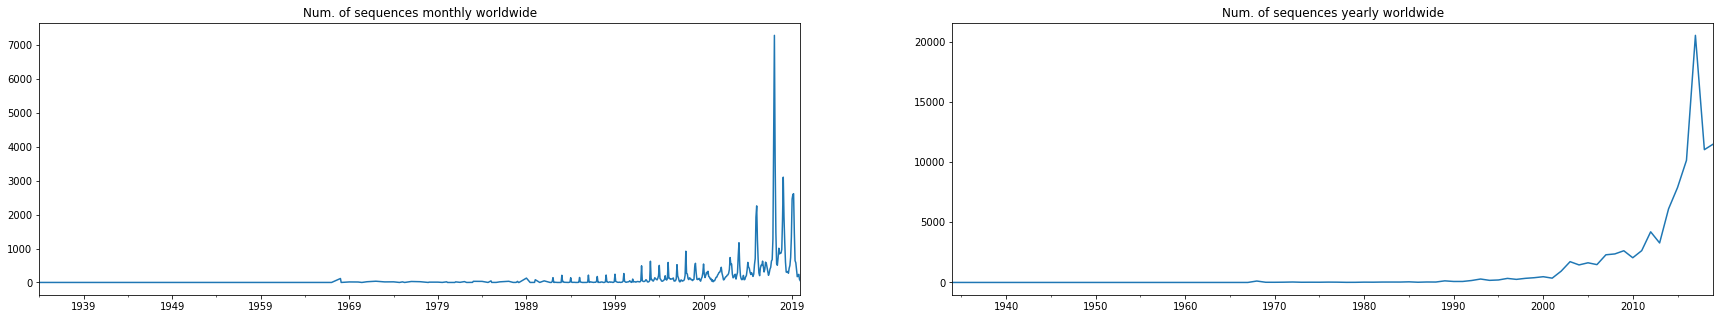

In [10]:
time_index_by_month = pd.to_datetime(df.date.values).to_period('M')
time_index_by_year = pd.to_datetime(df.date.values).to_period('Y')

fig, axes = plt.subplots(1, 2, figsize=(30, 5))
df.groupby(time_index_by_month).size().plot(ax=axes[0], title="Num. of sequences monthly worldwide")
df.groupby(time_index_by_year).size().plot(ax=axes[1], title="Num. of sequences yearly worldwide")

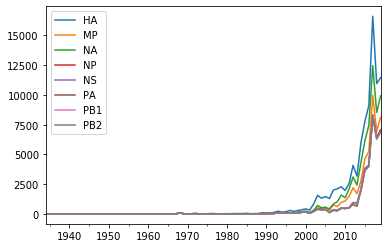

In [11]:
df.iloc[:,0:8].groupby(time_index_by_year).count().plot()

In [14]:
def f(x):
    count = 0
    for i in x:
        if i == np.nan:
            count += 1
    return count

df_with_genome = df[df.iloc[:, 0:8].count(axis='columns') == 8]

In [15]:
df_with_genome.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country
EPI_ISL_357668,EPI1447649,EPI1447644,EPI1447648,EPI1447642,EPI1447643,EPI1447645,EPI1447647,EPI1447646,2003-05-20,NaN,Oceania / New Zealand / Waikato / Waikato,A/Waikato/1/2003,Oceania,New Zealand
EPI_ISL_302517,EPI1193545,EPI1193548,EPI1193547,EPI1193546,EPI1193549,EPI1193544,EPI1193543,EPI1193542,2003-03-04,NaN,North America / Mexico,A/Mexico/InDRE2664/2003,North America,Mexico
EPI_ISL_154544,EPI502273,EPI502275,EPI502277,EPI502279,EPI502281,EPI501853,EPI502283,EPI502285,2005-01-01,NaN,North America / United States / Wisconsin,A/Wisconsin/67/2005,North America,United States
EPI_ISL_154543,EPI502219,EPI502220,EPI502221,EPI502222,EPI502223,EPI501852,EPI502224,EPI502225,2005-01-01,NaN,North America / United States / Washington,A/Wisconsin/67/2005,North America,United States
EPI_ISL_154540,EPI502300,EPI502302,EPI502304,EPI502306,EPI502308,EPI501849,EPI502310,EPI502312,2005-01-01,NaN,North America / United States / Wisconsin,A/Wisconsin/67/2005,North America,United States


In [13]:
with open("/home/zeng/Desktop/index", "w") as f:
    f.writelines("\n".join(df_with_genome.index.values))

In [16]:
index_with_genome = df_with_genome.HA.values

In [17]:
import sys, os
label_path = "/home/zeng/Desktop/Global_traced_label/"
def read_label(path):
    with open(path) as f:
        lines = f.readlines()
    return {line.split()[0].strip(): [line.split()[1].strip(), _region] for line in lines}

global_label = {}
files = os.listdir(label_path)
regions = [name.split("_")[0] for name in files]

for _region, _file in zip(regions, files):
    current_path = os.path.join(label_path, _file)
    data = read_label(current_path)
    global_label.update(data)

In [18]:
_label = pd.DataFrame(global_label).T
_label.head()

,0,1
EPI564512,4,USA
EPI575362,4,USA
EPI575649,4,USA
EPI932479,4,USA
EPI662817,4,USA


In [20]:
df_with_cluster = pd.merge(df_with_genome, _label, left_on='HA', right_index=True)
df_with_cluster = df_with_cluster.rename(columns={0:"cluster", 1:"region2"})
df_with_cluster.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country,cluster,region2
EPI_ISL_143045,EPI458038,EPI458171,EPI458304,EPI458436,EPI458551,EPI458953,EPI458636,EPI459036,2009-06-26,NaN,Asia / Singapore,A/Singapore/H2009.485/2009,Asia,Singapore,3,SEAsia
EPI_ISL_143017,EPI458010,EPI458143,EPI458276,EPI458409,EPI458527,EPI458925,EPI458610,EPI458739,2009-11-11,NaN,Asia / Singapore,A/Singapore/C2009.863/2009,Asia,Singapore,3,SEAsia
EPI_ISL_143016,EPI458009,EPI458142,EPI458275,EPI458408,EPI458526,EPI458924,EPI458802,EPI458738,2009-07-07,NaN,Asia / Singapore,A/Singapore/C2009.515/2009,Asia,Singapore,3,SEAsia
EPI_ISL_142941,EPI457927,EPI458068,EPI458201,EPI458334,EPI458463,EPI458869,EPI458816,EPI458668,2009-06-26,NaN,Asia / Singapore,A/Singapore/C2009.485a/2009,Asia,Singapore,3,SEAsia
EPI_ISL_140227,EPI444788,EPI445512,EPI445246,EPI445003,EPI446335,EPI456790,EPI444355,EPI444085,2009-06-06,NaN,Asia / Taiwan,A/Taiwan/749/2009,Asia,Taiwan,3,SEAsia


In [24]:
df_with_cluster.groupby(['region2', 'cluster']).size().unstack(1)

cluster,0,1,10,11,12,16,17,19,2,21,...,34,35,36,4,40,5,6,7,8,9
region2,,,,,,,,,,,,,,,,,,,,,
Aus,465.0,60.0,8.0,NaN,NaN,NaN,80.0,NaN,234.0,NaN,...,NaN,NaN,NaN,247.0,130.0,82.0,61.0,66.0,NaN,NaN
Europe,52.0,1485.0,NaN,NaN,NaN,14.0,332.0,NaN,94.0,23.0,...,NaN,NaN,NaN,667.0,NaN,16.0,NaN,358.0,NaN,NaN
SEAsia,597.0,43.0,34.0,NaN,NaN,NaN,NaN,45.0,156.0,NaN,...,NaN,NaN,NaN,134.0,NaN,19.0,294.0,461.0,180.0,NaN
USA,2959.0,244.0,NaN,1137.0,125.0,NaN,NaN,NaN,3664.0,NaN,...,347.0,12.0,34.0,644.0,NaN,236.0,268.0,504.0,1581.0,618.0


In [28]:
df_with_cluster['cluster2'] = df_with_cluster.region2.str.cat(df_with_cluster.cluster, sep='_')
df_with_cluster.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country,cluster,region2,cluster2
EPI_ISL_143045,EPI458038,EPI458171,EPI458304,EPI458436,EPI458551,EPI458953,EPI458636,EPI459036,2009-06-26,NaN,Asia / Singapore,A/Singapore/H2009.485/2009,Asia,Singapore,3,SEAsia,SEAsia_3
EPI_ISL_143017,EPI458010,EPI458143,EPI458276,EPI458409,EPI458527,EPI458925,EPI458610,EPI458739,2009-11-11,NaN,Asia / Singapore,A/Singapore/C2009.863/2009,Asia,Singapore,3,SEAsia,SEAsia_3
EPI_ISL_143016,EPI458009,EPI458142,EPI458275,EPI458408,EPI458526,EPI458924,EPI458802,EPI458738,2009-07-07,NaN,Asia / Singapore,A/Singapore/C2009.515/2009,Asia,Singapore,3,SEAsia,SEAsia_3
EPI_ISL_142941,EPI457927,EPI458068,EPI458201,EPI458334,EPI458463,EPI458869,EPI458816,EPI458668,2009-06-26,NaN,Asia / Singapore,A/Singapore/C2009.485a/2009,Asia,Singapore,3,SEAsia,SEAsia_3
EPI_ISL_140227,EPI444788,EPI445512,EPI445246,EPI445003,EPI446335,EPI456790,EPI444355,EPI444085,2009-06-06,NaN,Asia / Taiwan,A/Taiwan/749/2009,Asia,Taiwan,3,SEAsia,SEAsia_3


In [29]:
cluster_label = {}
with open("/home/zeng/Desktop/cluster_label.txt") as f:
    for line in f:
        cluster = line.split(" ")[0]
        label = line.split(" ")[1][1:-1]
        cluster_label[cluster] = label

In [31]:
df_with_cluster['cluster3'] = df_with_cluster.cluster2.map(cluster_label)
df_with_cluster.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country,cluster,region2,cluster2,cluster3
EPI_ISL_143045,EPI458038,EPI458171,EPI458304,EPI458436,EPI458551,EPI458953,EPI458636,EPI459036,2009-06-26,NaN,Asia / Singapore,A/Singapore/H2009.485/2009,Asia,Singapore,3,SEAsia,SEAsia_3,A09
EPI_ISL_143017,EPI458010,EPI458143,EPI458276,EPI458409,EPI458527,EPI458925,EPI458610,EPI458739,2009-11-11,NaN,Asia / Singapore,A/Singapore/C2009.863/2009,Asia,Singapore,3,SEAsia,SEAsia_3,A09
EPI_ISL_143016,EPI458009,EPI458142,EPI458275,EPI458408,EPI458526,EPI458924,EPI458802,EPI458738,2009-07-07,NaN,Asia / Singapore,A/Singapore/C2009.515/2009,Asia,Singapore,3,SEAsia,SEAsia_3,A09
EPI_ISL_142941,EPI457927,EPI458068,EPI458201,EPI458334,EPI458463,EPI458869,EPI458816,EPI458668,2009-06-26,NaN,Asia / Singapore,A/Singapore/C2009.485a/2009,Asia,Singapore,3,SEAsia,SEAsia_3,A09
EPI_ISL_140227,EPI444788,EPI445512,EPI445246,EPI445003,EPI446335,EPI456790,EPI444355,EPI444085,2009-06-06,NaN,Asia / Taiwan,A/Taiwan/749/2009,Asia,Taiwan,3,SEAsia,SEAsia_3,A09


In [33]:
df_with_cluster.groupby(['region2', 'cluster3']).size().unstack(1)

cluster3,A09,A19,A19+,G16,H13,H13+,H17,H17-,IC11,K14,K14+,K14-,NE07,S17,X12
region2,,,,,,,,,,,,,,,
Aus,8.0,82.0,NaN,247.0,66.0,NaN,234.0,80.0,60.0,465.0,NaN,130.0,NaN,61.0,50.0
Europe,NaN,358.0,14.0,667.0,94.0,NaN,686.0,23.0,52.0,1485.0,NaN,14.0,16.0,332.0,NaN
SEAsia,137.0,180.0,34.0,461.0,156.0,NaN,294.0,131.0,134.0,597.0,NaN,45.0,19.0,NaN,43.0
USA,125.0,618.0,12.0,1137.0,644.0,504.0,3601.0,347.0,244.0,2959.0,1581.0,34.0,236.0,3664.0,268.0


In [36]:
time_index_by_month = pd.to_datetime(df_with_cluster.date.values).to_period('M')
time_index_by_quarter = pd.to_datetime(df_with_cluster.date.values).to_period('Q-DEC')
time_index_by_year = pd.to_datetime(df_with_cluster.date.values).to_period('A-OCT')

In [48]:
summary = df_with_cluster.groupby(['region2', time_index_by_quarter, 'cluster3']).size().unstack(2).fillna(0)
summary_pct = summary.div(summary.sum(axis=1), axis=0)
summary_pct

cluster3             A09       A19      A19+       G16       H13      H13+  \
region2                                                                      
Aus     2009Q2  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2009Q3  0.714286  0.000000  0.000000  0.000000  0.000000  0.000000   
        2010Q2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2010Q3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2010Q4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2011Q1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2011Q3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2011Q4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q4  0.000000  0.000000  0.000000  0.000000  0.333333  0.000000   
        2013Q1  0.142857  0.000000  0.000000  0.000000  0.285714  0.000000   
        2013Q2  0.000000  0.000000  0.000000  0.000000  0.571429  0.000000   
        2013Q3  0.000000  0.000000  0.000000  0.000000  0.285714  0.000000   
        2013Q4  0.000000  0.000000  0.000000  0.000000  0.500000  0.000000   
        2014Q1  0.000000  0.000000  0.000000  0.000000  0.583333  0.000000   
        2014Q2  0.000000  0.000000  0.000000  0.047619  0.333333  0.000000   
        2014Q3  0.000000  0.000000  0.000000  0.000000  0.633333  0.000000   
        2014Q4  0.000000  0.000000  0.000000  0.090909  0.363636  0.000000   
        2015Q1  0.000000  0.000000  0.000000  0.102564  0.128205  0.000000   
        2015Q2  0.000000  0.000000  0.000000  0.030303  0.075758  0.000000   
        2015Q3  0.000000  0.000000  0.000000  0.035714  0.062500  0.000000   
        2015Q4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2016Q1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2016Q2  0.000000  0.000000  0.000000  0.066667  0.000000  0.000000   
        2016Q3  0.000000  0.000000  0.000000  0.221154  0.000000  0.000000   
        2016Q4  0.000000  0.000000  0.000000  0.171429  0.000000  0.000000   
        2017Q1  0.000000  0.000000  0.000000  0.184615  0.000000  0.000000   
        2017Q2  0.000000  0.000000  0.000000  0.190476  0.000000  0.000000   
...                  ...       ...       ...       ...       ...       ...   
USA     2012Q3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q4  0.000000  0.000000  0.000000  0.000000  0.380952  0.000000   
        2013Q1  0.000000  0.000000  0.000000  0.000000  0.595819  0.000000   
        2013Q2  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
        2013Q3  0.000000  0.000000  0.000000  0.000000  0.750000  0.125000   
        2013Q4  0.000000  0.000000  0.000000  0.000000  0.571429  0.000000   
        2014Q1  0.000000  0.000000  0.000000  0.000000  0.000000  0.230769   
        2014Q2  0.000000  0.000000  0.000000  0.000000  0.000000  0.235294   
        2014Q3  0.000000  0.000000  0.000000  0.000000  0.336449  0.158879   
        2014Q4  0.000000  0.000000  0.000000  0.002186  0.233880  0.046995   
        2015Q1  0.000000  0.000000  0.000000  0.005556  0.118889  0.021111   
        2015Q2  0.000000  0.000000  0.000000  0.000000  0.023529  0.000000   
        2015Q3  0.000000  0.000000  0.000000  0.012371  0.000000  0.006186   
        2015Q4  0.000000  0.000000  0.000000  0.000000  0.000000  0.035144   
        2016Q1  0.000000  0.000000  0.000000  0.039216  0.000000  0.405882   
        2016Q2  0.000000  0.000000  0.000000  0.067568  0.000000  0.599099   
        2016Q3  0.000000  0.000000  0.000000  0.159204  0.000000  0.029851   
        2016Q4  0.000000  0.000000  0.000000  0.278515  0.000000  0.035809   
        2017Q1  0.0000

In [96]:
print('\n'.join(summary_pct.columns.values))

A09
A19
A19+
G16
H13
H13+
H17
H17-
IC11
K14
K14+
K14-
NE07
S17
X12


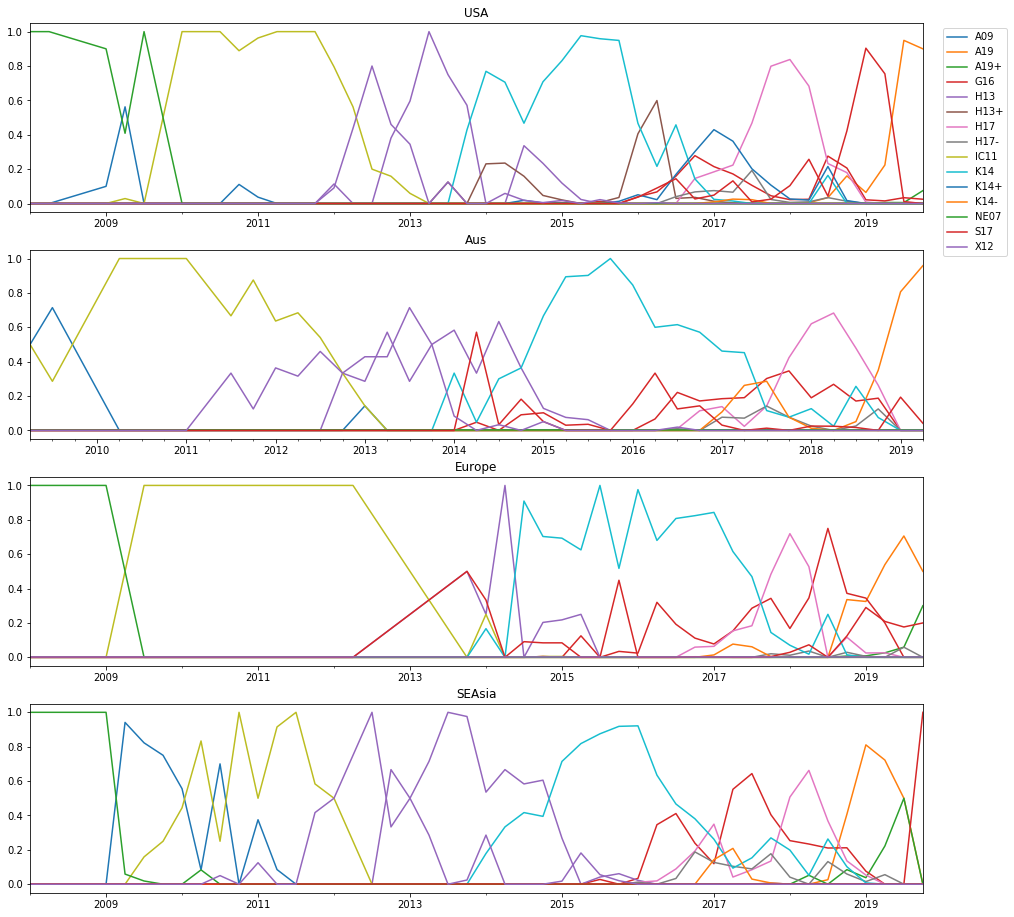

In [92]:
fig, axes = plt.subplots(4, 1, figsize=(16, 16))
summary_pct.loc['USA', :].plot(ax=axes[0], legend=False, title='USA')
summary_pct.loc['Aus', :].plot(ax=axes[1], legend=False, title='Aus')
summary_pct.loc['Europe', :].plot(ax=axes[2], legend=False, title='Europe')
summary_pct.loc['SEAsia', :].plot(ax=axes[3], legend=False, title='SEAsia')

plt.legend(bbox_to_anchor=(1.1, 4.6))

## 全球分析 抽样

In [39]:
df_sample = df_with_cluster.groupby([time_index_by_year, 'region2']).apply(lambda x: x if len(x) < 100 else x.sample(100, random_state=1)).reset_index([0,1], drop=True)
df_sample.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country,cluster,region2,cluster2,cluster3
EPI_ISL_164037,EPI535428,EPI535431,EPI535430,EPI535429,EPI535432,EPI535427,EPI535426,EPI535425,2008-02-25,NaN,Europe / France / Brittany / Departement d'Ill...,A/Paris/2030/2008,Europe,France,5,Europe,Europe_5,NE07
EPI_ISL_164038,EPI535436,EPI535439,EPI535438,EPI535437,EPI535440,EPI535435,EPI535434,EPI535433,2008-10-21,NaN,Europe / France / Region Lorraine / Departemen...,A/Paris/123/2008,Europe,France,5,Europe,Europe_5,NE07
EPI_ISL_140220,EPI444782,EPI445505,EPI445239,EPI444996,EPI446327,EPI456796,EPI444348,EPI444078,2008-01-17,NaN,Asia / Taiwan,A/Taiwan/21/2008,Asia,Taiwan,5,SEAsia,SEAsia_5,NE07
EPI_ISL_140212,EPI444783,EPI445507,EPI445241,EPI444998,EPI446329,EPI456793,EPI444350,EPI444070,2008-07-16,NaN,Asia / Taiwan,A/Taiwan/424/2008,Asia,Taiwan,5,SEAsia,SEAsia_5,NE07
EPI_ISL_140219,EPI444781,EPI445504,EPI445238,EPI444995,EPI446326,EPI456791,EPI444347,EPI444077,2008-01-04,NaN,Asia / Taiwan,A/Taiwan/4/2008,Asia,Taiwan,5,SEAsia,SEAsia_5,NE07


In [41]:
df_sample = df_sample[['HA', 'MP', 'NA', 'NP', 'NS', 'PA', 'PB1', 'PB2', 'region2', 'cluster3', 'name', 'date']]
df_sample.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,region2,cluster3,name,date
EPI_ISL_164037,EPI535428,EPI535431,EPI535430,EPI535429,EPI535432,EPI535427,EPI535426,EPI535425,Europe,NE07,A/Paris/2030/2008,2008-02-25
EPI_ISL_164038,EPI535436,EPI535439,EPI535438,EPI535437,EPI535440,EPI535435,EPI535434,EPI535433,Europe,NE07,A/Paris/123/2008,2008-10-21
EPI_ISL_140220,EPI444782,EPI445505,EPI445239,EPI444996,EPI446327,EPI456796,EPI444348,EPI444078,SEAsia,NE07,A/Taiwan/21/2008,2008-01-17
EPI_ISL_140212,EPI444783,EPI445507,EPI445241,EPI444998,EPI446329,EPI456793,EPI444350,EPI444070,SEAsia,NE07,A/Taiwan/424/2008,2008-07-16
EPI_ISL_140219,EPI444781,EPI445504,EPI445238,EPI444995,EPI446326,EPI456791,EPI444347,EPI444077,SEAsia,NE07,A/Taiwan/4/2008,2008-01-04


In [97]:
df_sample.to_json("/home/zeng/Desktop/sample_index", orient='index', date_format='iso')

In [42]:
df_sample.groupby(['region2', 'cluster3']).size().unstack()

cluster3,A09,A19,A19+,G16,H13,H13+,H17,H17-,IC11,K14,K14+,K14-,NE07,S17,X12
region2,,,,,,,,,,,,,,,
Aus,8.0,68.0,NaN,76.0,55.0,NaN,70.0,21.0,60.0,212.0,NaN,26.0,NaN,38.0,48.0
Europe,NaN,36.0,NaN,77.0,34.0,NaN,68.0,5.0,50.0,277.0,NaN,1.0,16.0,56.0,NaN
SEAsia,114.0,62.0,17.0,105.0,117.0,NaN,77.0,22.0,130.0,190.0,NaN,5.0,17.0,NaN,41.0
USA,60.0,20.0,1.0,35.0,105.0,40.0,109.0,9.0,163.0,203.0,48.0,1.0,141.0,95.0,60.0


In [156]:
import json

def read_fasta(path):
    with open(path) as f:
        result = {}
        for line in f:
            if line.startswith(">"):
                label = line[1:-1]
                result[label] = ""
            else:
                result[label] += line.strip()
    return result

segment_sequences = pd.Series(read_fasta("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_HA.fasta"))

In [174]:
segment_sequences = segment_sequences[df_sample.HA]
segment_sequences.head()

HA
EPI535428    MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTIVKTIT...
EPI535436    MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTIVKTIT...
EPI444782    NDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGEI...
EPI444783    KDNSTATLCLGHHAVPNGTMVKTITNDQIEVTNATELVQSSSTGEI...
EPI444781    NDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGEI...
dtype: object

In [187]:
segment_sequences.index = df_sample.index
segment_sequences.name = 'sequence'
segment_sequences.head()

index_x
EPI_ISL_164037    MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTIVKTIT...
EPI_ISL_164038    MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTIVKTIT...
EPI_ISL_140220    NDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGEI...
EPI_ISL_140212    KDNSTATLCLGHHAVPNGTMVKTITNDQIEVTNATELVQSSSTGEI...
EPI_ISL_140219    NDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGEI...
Name: sequence, dtype: object

In [188]:
ha_sample = df_sample[['region2', 'cluster3', 'name', 'date']].merge(segment_sequences, left_index=True, right_index=True)
ha_sample.head()

,region2,cluster3,name,date,sequence
index_x,,,,,
EPI_ISL_164037,Europe,NE07,A/Paris/2030/2008,2008-02-25,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTIVKTIT...
EPI_ISL_164038,Europe,NE07,A/Paris/123/2008,2008-10-21,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTIVKTIT...
EPI_ISL_140220,SEAsia,NE07,A/Taiwan/21/2008,2008-01-17,NDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGEI...
EPI_ISL_140212,SEAsia,NE07,A/Taiwan/424/2008,2008-07-16,KDNSTATLCLGHHAVPNGTMVKTITNDQIEVTNATELVQSSSTGEI...
EPI_ISL_140219,SEAsia,NE07,A/Taiwan/4/2008,2008-01-04,NDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGEI...


In [43]:
import json

def read_fasta(path):
    with open(path) as f:
        result = {}
        for line in f:
            if line.startswith(">"):
                label = line[1:-1]
                result[label] = ""
            else:
                result[label] += line.strip()
    return result

def read_seg(path, seg1, seg2):
    segment_sequences = pd.Series(read_fasta(path))
    segment_sequences = segment_sequences[df_sample['%s' % seg1]]
    segment_sequences.index = df_sample.index
    segment_sequences.name = 'sequence'
    seg_sample = df_sample[['region2', 'cluster3', 'name', 'date']].merge(segment_sequences, left_index=True, right_index=True)
    with open('/home/zeng/Desktop/sample2/sample_%s.fasta' % seg2, 'w') as f:
        for index, region, cluster, date, sequence in zip(seg_sample.index, seg_sample.region2, seg_sample.cluster3, seg_sample.date, seg_sample.sequence):
            f.write(">%s_%s_%s_%s\n%s\n" % (index, region, cluster, date.strftime("%Y-%m-%d"), sequence))

read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_HA.fasta", "HA", "HA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NA.fasta", "NA", "NA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M1.fasta", "MP", "M1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M2.fasta", "MP", "M2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NP.fasta", "NP", "NP")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NS1.fasta", "NS", "NS1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PA.fasta", "PA", "PA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1-F2.fasta", "PB1", "PB1-F2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1.fasta", "PB1", "PB1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB2.fasta", "PB2", "PB2")